# Part 1: Playing with tabular data. The Iris Dataset.

The Iris dataset is a well-known and frequently used dataset in the field of machine learning and statistics. It was introduced by British biologist and statistician Ronald A. Fisher in 1936. The dataset consists of samples from three different species of Iris flowers, namely Setosa, Versicolor, and Virginica. Each species is represented by 50 samples, resulting in a total of 150 data points.

**Features**: The dataset contains four features (attributes) for each sample:

1. Sepal Length (in centimeters)
2. Sepal Width (in centimeters)
3. Petal Length (in centimeters)
4. Petal Width (in centimeters)

**Target Variable**: There is one target variable representing the species of each Iris flower sample. The target variable consists of three classes:
- Setosa (Class 0)
- Versicolor (Class 1)
- Virginica (Class 2)


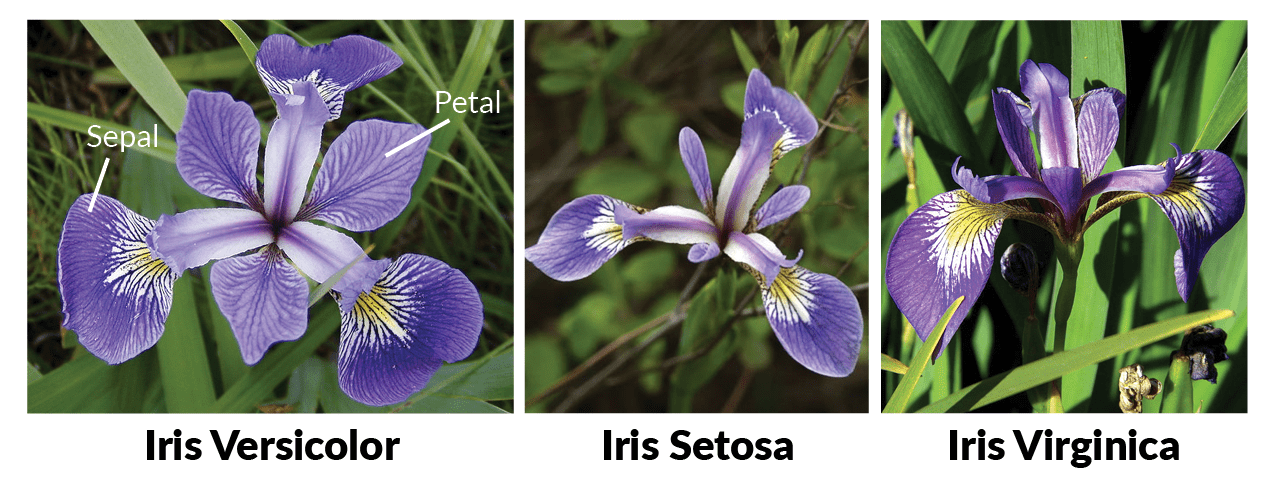

## Exercise 1: Load and understand the data.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


Download the dataset in csv format. (https://www.kaggle.com/datasets/arshid/iris-flower-dataset)

Load the dataset into a variable **iris**

In [2]:
# ===============#
# YOUR CODE HERE #
# ===============#
from sklearn import datasets
iris = datasets.load_iris()

Now create a function that plots two of the columns of the dataset (e.g. sepal length vs petal length) in a [scatter plot](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py). You can use the instructions:

*   `plt.figure()` to create a new figure
*   `ax.scatter(x_values, y_values)` to plot points (x,y) from two arrays.



In [3]:
def visualize_features(dataset, feature1_index, feature2_index, ax=None):
    """
    # Create a scatter plot for two of the features (e.g., sepal length vs. petal length)
    :feature1_index:   Index of the first feature (e.g., sepal length)
    :feature2_index:   Index of the second feature (e.g., ptal lengeth)
    """

    # If there is no ax, we create one and we make the "plt.show()"

    ax = plt.figure(figsize=(5,4)).gca() if ax is None else ax
    # Create a scatter plot

    ax.scatter(dataset[0:49,feature1_index],dataset[0:49,feature2_index], label="setosa", facecolor="blue")
    ax.scatter(dataset[50:99,feature1_index],dataset[50:99,feature2_index], label="versicolor", facecolor="green")
    ax.scatter(dataset[100:149,feature1_index],dataset[100:149,feature2_index], label="virginica", facecolor="red")

    # Show the plot
    if ax is None:
        ax.set_title('Iris Dataset - Scatter Plot')
        plt.tight_layout()
        plt.show()


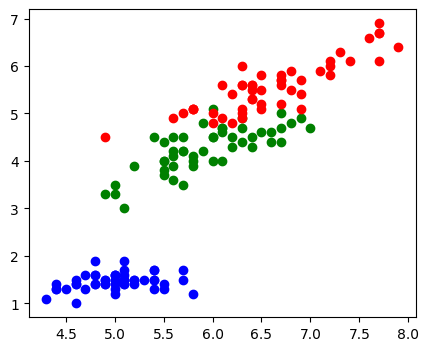

In [4]:
visualize_features(iris['data'], 0,2)

With the function you implemented before, now visualize all the 6 combinations of features.

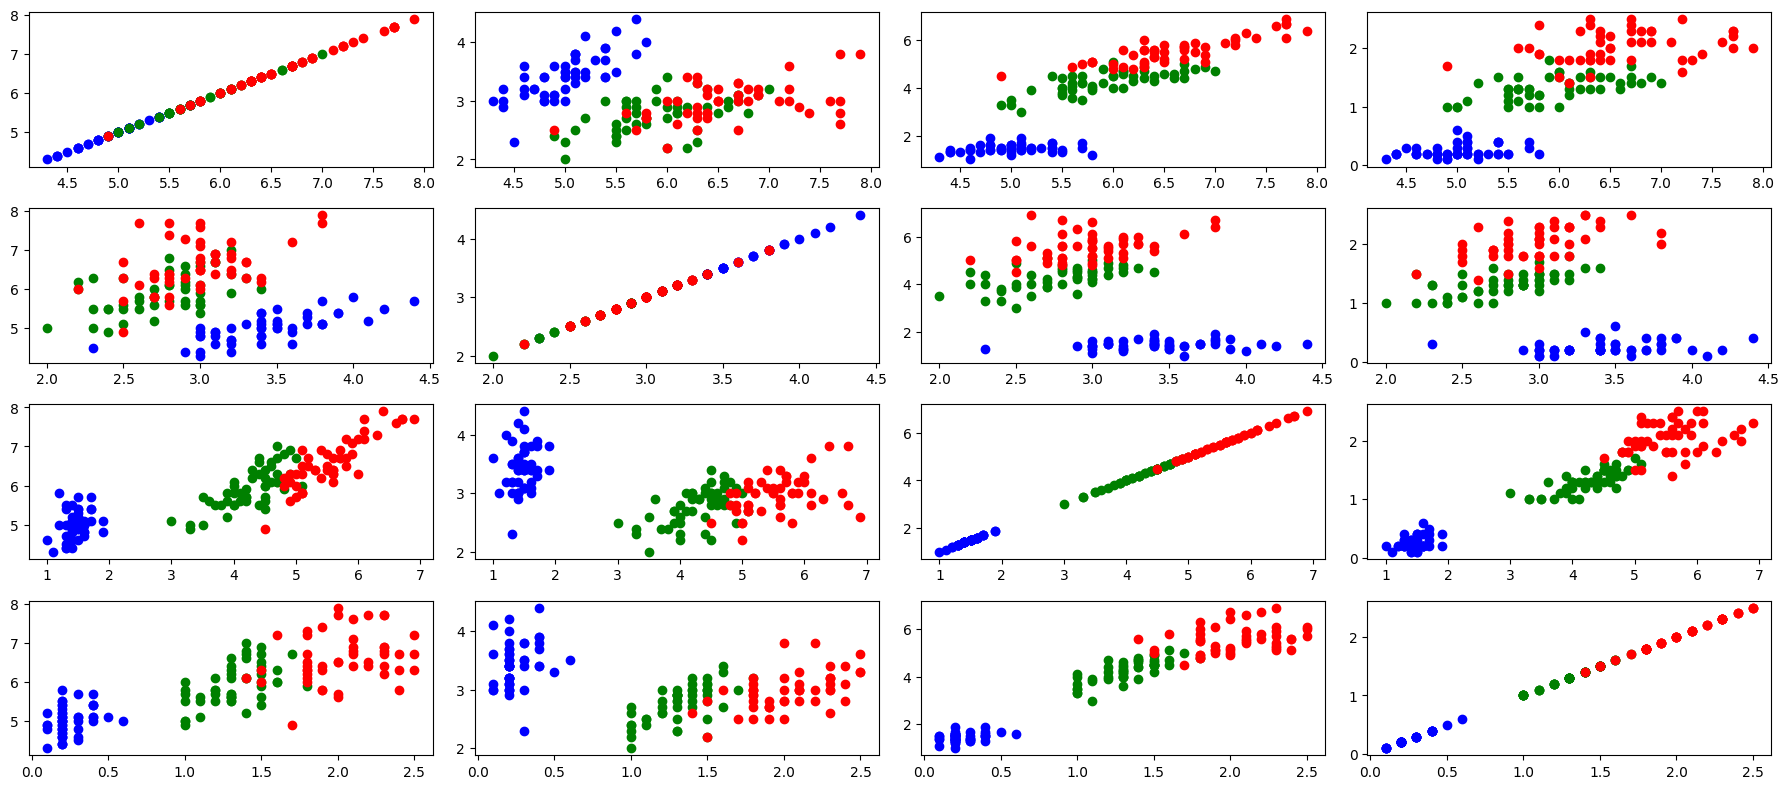

In [5]:
fig, axs = plt.subplots(4,4, figsize=(18,8))

for x_feature in range(4):
  for y_feature in range(4):
    visualize_features(iris['data'], x_feature, y_feature, axs[x_feature][y_feature])

plt.tight_layout()
plt.show()


## Excercise 2 - using the dataset

### En el cas de tenir malament l'apartat anterior, carrego el dataset a través de sklearn per estar tots en el mateix punt.

In [6]:
from sklearn import datasets
iris = datasets.load_iris()



Now split the dataset in X (features) and Y (labels).

Then create a function that splits into train/ test based on % amount.

In [7]:
X = iris["data"]
y = iris["target"]
# y format is a vector with 3 different values "0, 1, 2" instead of the "versicolor, virginica, setosa" labels

import random

def data_splitter(X, y, train=0.8, shuffle=True):
  cut = int(len(y)*train)
  zipped_data = list(zip(X,y))
  if shuffle:
    random.shuffle(zipped_data)
  X_train, y_train = zip(*zipped_data[0:cut])
  X_test, y_test = zip(*zipped_data[cut:])
  return X_train, y_train, X_test, y_test


data_splitter([1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10], shuffle=False)

((1, 2, 3, 4, 5, 6, 7, 8), (1, 2, 3, 4, 5, 6, 7, 8), (9, 10), (9, 10))

Use the function that you created previously to split the data so that we can use the 70% of data for training and the 30% for testing.

In [8]:
# X_train, y_train, X_test, y_test = data_splitter(X, y, 0.7)

# Or load from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Logistic Regression
Let's first train a Logistic Regression model (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression).

In [9]:
from sklearn.linear_model import LogisticRegression

# entrenament
classifier= LogisticRegression().fit(X_train, y_train)

# test
y_pred = classifier.predict(X_test)

# calculate accuracy

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(acc)

#y_pred = classificador(X_test)
#acc =

1.0


Check the `ConfusionMatrixDisplay.from_predictions` [function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) and use it to visualize the confusion matrix for the test set.

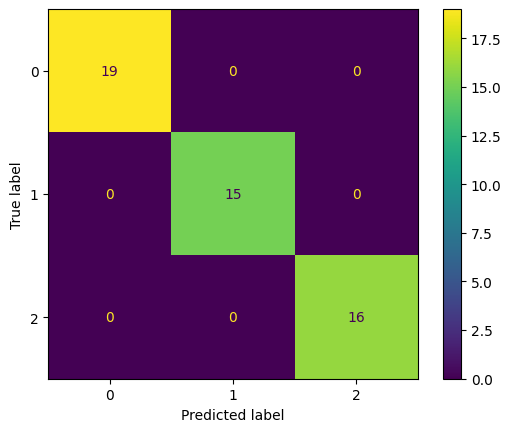

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

### Decision Tree

Let's now train a DecisionTreeClassifier (https://scikit-learn.org/stable/modules/tree.html#decision-trees). We will train it, predict the test set, visualize the classification tree and its confusion matrix.

0.98


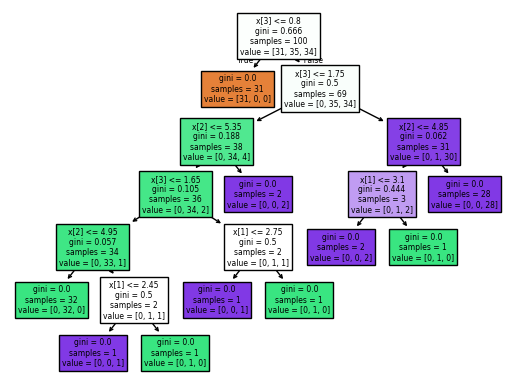

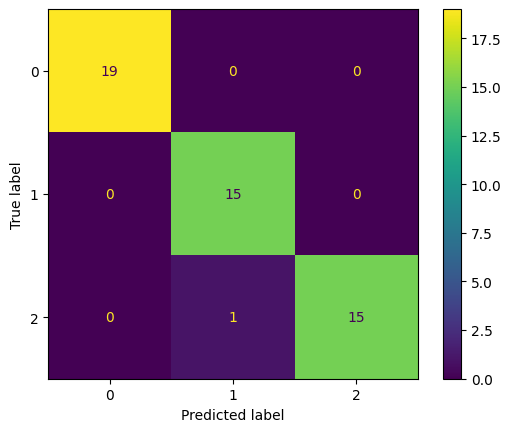

In [11]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

tree.plot_tree(classifier, filled=True)

ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

Check the tree that we just plot... Now check the plots of the beginning. Do you see the relation between them?

### Forests

How to solve Decision Tree problems?


0.98
0.98


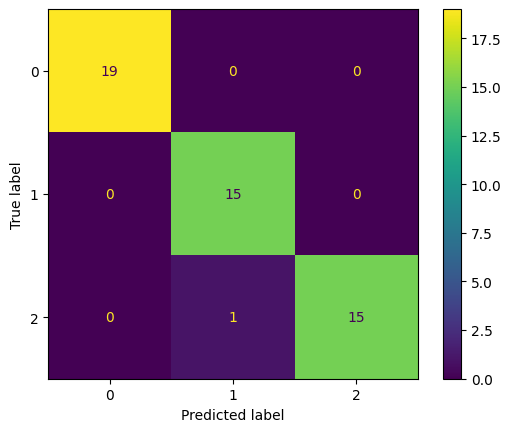

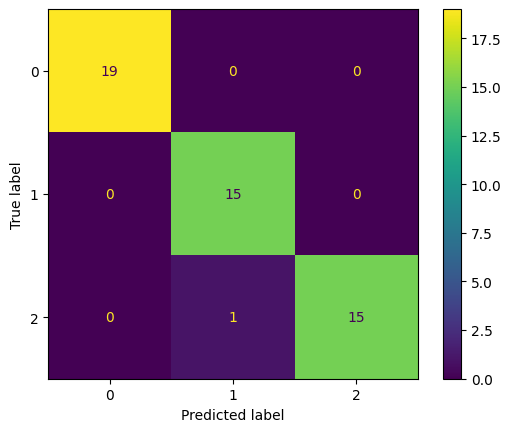

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

GBC = GradientBoostingClassifier()

GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(acc)


RFC = RandomForestClassifier()

RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

ConfusionMatrixDisplay.from_estimator(GBC, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(RFC, X_test, y_test)

### SVM

Let's now train a SVM classifier (https://scikit-learn.org/stable/modules/svm.html#svm). We will train it, predict the test set and its confusion matrix.

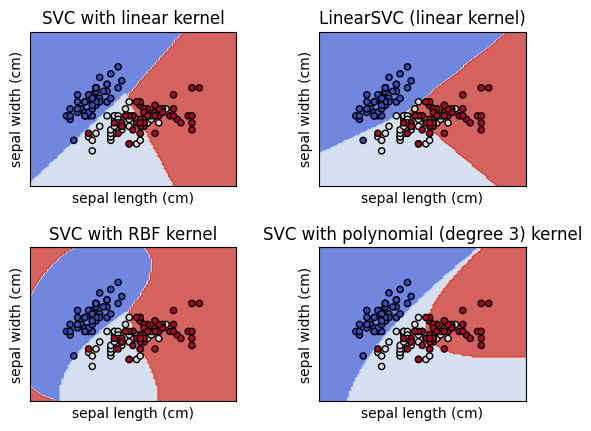

In [13]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()

# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### other classifiers

Check other classifiers available in scikit library (at least 2 more)


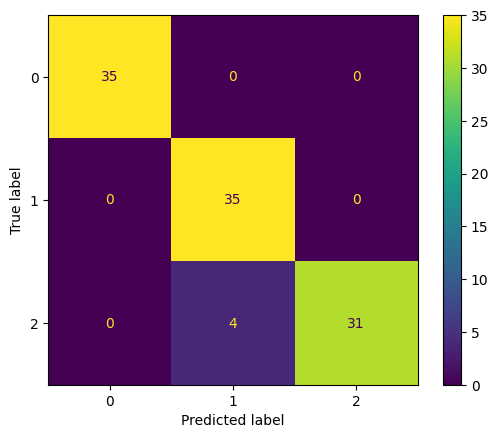

In [14]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,

stratify=y, test_size=0.7, random_state=42)

nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)

nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(nca_pipe, X_test, y_test)
